In [22]:
import mariadb
import sys 
import os
from dotenv import load_dotenv
import pandas as pd
load_dotenv()
passwd = os.getenv('PASSWD')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [16]:
def create_rfm_table(date: str):
    try: 
        conn = mariadb.connect(user='root',
                              password=passwd,
                              host='localhost',
                              port=3306,
                              database='orders')
    except mariadb.Error as e:
        print(f'error')
        sys.exit()  
    
    
    cur = conn.cursor()
    rfm_table = pd.read_sql_query(f''' 
                    SELECT * FROM `rfm_table_{(date).replace('-', '')}`''', conn)
    return rfm_table

In [17]:
rfmtable01 = create_rfm_table('2017-01-01')
rfmtable02 = create_rfm_table('2017-02-01')
rfmtable03 = create_rfm_table('2017-03-01')

<Figure size 1440x576 with 0 Axes>

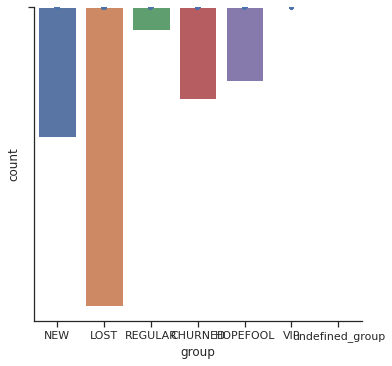

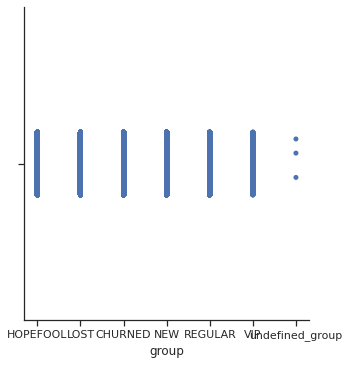

In [33]:
plt.figure(figsize=(20, 8))
sns.catplot(x='group', data=rfmtable01);
sns.countplot(x='group', data=rfmtable02);
sns.catplot(x='group', data=rfmtable03);


In [ ]:
plt.figure(figsize=(20, 8))
sns.catplot(x="day", y="total_bill", hue="group", kind="box", data=rfmtable01)